In [1]:
import pandas as pd

In [8]:
co=pd.read_csv('data/先进制造上市企业.csv',index_col=0)
co

,0
0,TCL中环新能源科技股份有限公司
1,TCL科技集团股份有限公司
2,七星电气股份有限公司
3,万马科技股份有限公司
4,三友联众集团股份有限公司
...,...
2779,黑龙江林海华安新材料股份有限公司
2780,黑龙江省发现者机器人股份有限公司
2781,齐峰新材料股份有限公司
2782,龙芯中科技术股份有限公司


In [12]:
co['0'].dropna().nunique()

2783

In [13]:
bridgew=pd.read_csv('data/patent_bridge.csv')

In [14]:
bridgew.shape

(9338426, 8)

In [15]:
bridgew

,Unnamed: 0,序号,公开（公告）号,申请号,申请日,申请人,标题 (中文),table
0,0,1,CN114587079A,CN202210229642.3,2022-03-09,江西晶亮实业有限公司,一种便携式可移动的靠背课椅,patent_incopat_202101_202211
1,1,2,CN114587081A,CN202210023433.3,2022-01-10,皖西学院,一种面条生产用的组合式储物柜,patent_incopat_202101_202211
2,2,3,CN114587082A,CN202210242336.3,2022-03-13,尚品本色智能家居有限公司,一种自动平衡服装数量的衣柜,patent_incopat_202101_202211
3,3,4,CN114587083A,CN202210058364.X,2022-01-19,宁波工程学院,一种可自动取放的智能鞋柜,patent_incopat_202101_202211
4,4,5,CN114587084A,CN202210133941.7,2022-02-14,江苏诺德物流设备制造有限公司,一种轻便的可移动密集架及其使用方法,patent_incopat_202101_202211
...,...,...,...,...,...,...,...,...
9338421,235,2260236,PH12021551776A1,PH12021551776,NaN,Hangzhou Dac Biotech Co Ltd,鹅膏蕈毒素与分支接头的缀合物,patent202404
9338422,236,2260237,PH12021500050A1,PH12021500050,NaN,Hangzhou Dac Biotech Co Ltd,细胞毒性剂与具有分支接头的细胞结合分子的缀合物,patent202404
9338423,237,2260238,PH12021551878A1,PH12021551878,NaN,Sansure Biotech Inc,核酸释放剂、核酸PCR扩增方法及PCR扩增试剂盒,patent202404
9338424,238,2260239,PH12021552622A1,PH12021552622,NaN,Shanghai Junshi Biosciences Co Ltd,抗PD-1抗体在制备治疗实体瘤药物中的应用,patent202404


In [16]:
co_data=bridgew['申请人'].str.split(';',expand=True).stack().str.strip().reset_index(level=1,drop=True).rename('Co')

In [20]:
co_data.isin(co['0'].dropna().unique()).sum()

805018

In [32]:
patent_stack=co_data.isin(co['0'].dropna().unique())
patent_co=bridgew.loc[patent_stack[patent_stack].index]
patent_co['Co']=co_data[patent_stack]

In [42]:
patent_co['Co'].value_counts()

Co
珠海格力电器股份有限公司        98919
中兴通讯股份有限公司          85880
美的集团股份有限公司          70569
京东方科技集团股份有限公司       48646
海尔智家股份有限公司          27862
                    ...  
上海华魏科技股份有限公司            1
北京泰诚信测控技术股份有限公司         1
四川雷克斯智慧科技股份有限公司         1
苏州海中航空科技股份有限公司          1
辽宁经纬测绘规划建设股份有限公司        1
Name: count, Length: 2497, dtype: int64

In [38]:
patent_co.table.value_counts()

table
patent202210                    485039
patent202404                    197130
patent_incopat_202101_202211    109854
patent_incopat_202212_202312     12773
patent202309                       222
Name: count, dtype: int64

In [41]:
patent_co.rename(columns={'Unnamed: 0':'index'}).to_csv('data/先进制造上市企业专利.csv')

In [ ]:
tb_id=data.groupby('table')['申请号'].apply(lambda x:x.to_list())

In [ ]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
batch_size=5000
df_filter = pd.DataFrame()
for table in tb_id.index:
    query = text(f'SELECT `公开（公告）号`,申请号,`摘要 (中文)` FROM `{table}` WHERE `申请号` in :ids')
    ids = tuple(tb_id[table])
    for batch in chunks(ids, batch_size):
        #result = db.session.execute(query, {'ids': ids})
        for i,chunk in enumerate(pd.read_sql_query(query, con=engine,chunksize=10000, params={'ids': batch})):
            df_filter = pd.concat([df_filter,chunk])
            print(i,chunk.shape[0],len(batch))
            del chunk
    print(table,df_filter.shape[0])

In [ ]:
data=pd.merge(data,df_filter,on=['公开（公告）号','申请号'],how='left')
data=data.sort_values('申请日',ascending=False).drop_duplicates(['公开（公告）号','申请号','Co'],keep='first')

In [43]:
patent_co=pd.read_csv('data\先进制造上市企业专利.csv',index_col=0)
patent_co.shape

(805017, 10)

In [44]:
patent_co.head()

,index,序号,公开（公告）号,申请号,申请日,申请人,标题 (中文),table,Co,摘要 (中文)
951897,111,2260112,CN117811516A,CN202410235904.6,2024-03-01,成都鹰谷米特科技有限公司; 重庆鹰谷光电股份有限公司,可变跨阻TIA放大器集成电路及激光脉冲探测器,patent202404,重庆鹰谷光电股份有限公司,本发明提供一种可变跨阻TIA放大器集成电路及激光脉冲探测器，属于激光测距应用技术领域。该集成...
951896,110,2260111,CN117807937A,CN202410236395.9,2024-03-01,成都鹰谷米特科技有限公司; 重庆鹰谷光电股份有限公司,脉冲光电探测前置放大电路数模混合集成电路芯片及设备,patent202404,重庆鹰谷光电股份有限公司,本申请提供一种脉冲光电探测前置放大电路数模混合集成电路芯片及设备，涉及激光空间定位应用的光电...
951895,74,2260075,CN117798129A,CN202410229864.4,2024-02-29,安泰爱科科技有限公司; 安泰科技股份有限公司,钕铁硼通过式超声波清洗机输送系统,patent202404,安泰科技股份有限公司,本发明公开了钕铁硼通过式超声波清洗机输送系统，属于输送设备技术领域。所述工作台顶部连接有两个...
951894,42,2260043,CN117775078A,CN202410216849.6,2024-02-28,山西阳光三极科技股份有限公司,一种基于深度学习的矿内货运列车行驶方向判断方法,patent202404,山西阳光三极科技股份有限公司,本发明涉及列车驾驶技术领域，尤其涉及一种基于深度学习的矿内货运列车行驶方向判断方法，该方法包...
951893,36,2260037,CN117805988A,CN202410222682.4,2024-02-28,中兴通讯股份有限公司,分纤箱及其连接件,patent202404,中兴通讯股份有限公司,本公开提供了一种分纤箱及其连接件，涉及通信FTTH和通信FTTR技术领域，用于将微管固定于通...


In [5]:
patent_co_0=pd.read_csv('data\patent_co_756_11k_202407.csv',usecols=['工商全称','序号','公开（公告）号','申请号','申请日','申请人','标题 (中文)','table_name','行业','摘要 (中文)','申请年', '首次上市日期', 'IPO上市日期', '子行业', '首次融资日期','ipo_date'])
patent_co_0.shape

C:\Users\Prime\AppData\Local\Temp\ipykernel_50160\4073800329.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_co_0=pd.read_csv('data\patent_co_756_11k_202407.csv',usecols=['工商全称','序号','公开（公告）号','申请号','申请日','申请人','标题 (中文)','table_name','行业','摘要 (中文)','申请年', '首次上市日期', 'IPO上市日期', '子行业', '首次融资日期','ipo_date'])


(756132, 16)

In [7]:
(patent_co_0.申请日>patent_co_0.ipo_date).sum()

0

In [2]:
from w2v_lda import *
Stopwords=set(read2list('data\\专利停用词表2024.txt'))

In [3]:
jieba.initialize()
jieba.load_userdict('data\\专利分词词库.txt') 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Prime\AppData\Local\Temp\jieba.cache
Loading model cost 0.774 seconds.
Prefix dict has been built successfully.


In [53]:
del patent_co['index']
del patent_co['序号']

In [73]:
patent_co['序号']=patent_co['公开（公告）号']
patent_co.reset_index(drop=True,inplace=True)

In [6]:
patent_co_0['Co']=patent_co_0['工商全称']
patent_co_0['序号']=patent_co_0['公开（公告）号']
patent_co_0.reset_index(drop=True,inplace=True)

In [57]:
wd_data=pd.read_parquet('data\patent_cut_doc_先进制造上市.parquet')
wd_data['词语']=wd_data['词语'].dropna().apply(lambda x: x.tolist())

In [12]:
Sentences_id=pd.read_parquet('data\patent_cut_doc_未上市.parquet').set_index('序号')
Sentences_id['词语']=Sentences_id['词语'].dropna().apply(lambda x: x.tolist())

In [82]:
wd_data.index,patent_co.index

(RangeIndex(start=0, stop=805017, step=1),
 RangeIndex(start=0, stop=805017, step=1))

In [83]:
import w2v_lda
import importlib
importlib.reload(w2v_lda)
from w2v_lda import *

In [84]:
%%time
model=W2vLda(sentences=wd_data['词语'],patent_data=patent_co,co_data=patent_co['Co'],suffix='先进制造上市',stop_words=Stopwords,
     vector_size=250,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=50,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)

CPU times: total: 969 ms
Wall time: 955 ms


In [13]:
%%time
model=W2vLda(sentences=None,patent_data=patent_co_0,co_data=patent_co_0['Co'],suffix='未上市',stop_words=Stopwords,
     vector_size=250,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=50,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)

CPU times: total: 16min 31s
Wall time: 16min 31s


In [13]:
model=W2vLda(sentences=Sentences_id['词语'],suffix='未上市',stop_words=Stopwords,
     vector_size=250,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=50,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)

In [14]:
model.load(lda=False)

In [112]:
model.id_data

0         CN117811516A
1         CN117807937A
2         CN117798129A
3         CN117775078A
4         CN117805988A
              ...     
805007      CN2248433Y
805012      CN3044990D
805014      CN2201504Y
805015      CN2202815Y
805016      CN1118043A
Name: 序号, Length: 802542, dtype: object

In [86]:
%%time
res=model.on_corpus()
print(res)
model.save()

topics_vec,documents_vec=model.on_topics()
np.save(f"data\\topics_vec_{model.suffix}.npy",np.array(topics_vec))

df_topic=model.df_topics(topn=30)
df_topic.to_excel(f'data\\patent_topic_words_{model.suffix}.xlsx')

df_lda_w2v=model.docs_vec(documents_vec,patent_co)

{'vector_size': 250, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 50, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
(140786, 109630, 109630)
CPU times: total: 2h 11min 47s
Wall time: 55min 45s


In [15]:
%%time
model.on_corpus()#统一分词，用同一个w2v，分行业做lda

{'vector_size': 250, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 50, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
CPU times: total: 2h 13min 20s
Wall time: 55min 35s


(160491, 124983, 124983)

In [16]:
model.save()

In [18]:
len(model.sentences)

753959

In [147]:
topics_words=model.topics_words(topn=30)
topics_words.value_counts()[:20]

word
系统    9
设有    8
相连    6
位于    6
产生    6
步骤    6
结构    5
接收    4
操作    4
表面    4
选择    4
方向    4
工作    4
性能    4
生产    4
功能    4
位置    4
效率    3
温度    3
进入    3
Name: count, dtype: int64

In [20]:
model.topics_words(topn=30).value_counts()[:20]

word
操作     6
接收     6
结构     5
步骤     5
生成     5
简单     5
相对     4
位于     4
表面     4
设备     4
实时     4
组成     4
服务器    4
设有     4
装配     3
发送     3
系统     3
移动     3
序列     3
生产     3
Name: count, dtype: int64

In [23]:
patent_co_0['行业'].value_counts()

行业
先进制造    545560
医疗健康    154422
金融       56089
Name: count, dtype: int64

In [32]:
Sentences_id=pd.concat([model.id_data,model.sentences],axis=1).set_index('序号')#整体分词数据

In [39]:
%%time
mask=patent_co_0['行业'] == '先进制造'
filtered_sentences = Sentences_id.loc[Sentences_id.index.isin(patent_co_0.loc[mask, '公开（公告）号'])]
model.on_init(filtered_sentences['标题 (中文)'],suffix='先进制造未上市')
model.dictionary=None
model.lda=None
model.on_corpus()

topics_vec,documents_vec=model.on_topics()
np.save(f"data\\topics_vec_{model.suffix}.npy",np.array(topics_vec))

df_topic=model.df_topics(topn=30)
df_topic.to_excel(f'data\\patent_topic_words_{model.suffix}.xlsx')

{'vector_size': 250, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 50, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
CPU times: total: 37min 5s
Wall time: 37min 8s


In [44]:
documents_vec.shape

(545613, 250)

In [46]:
model.sentences.index

Index(['CN118307746A', 'CN118307746A', 'CN220710520U', 'CN220691003U',
       'CN220692184U', 'CN220692471U', 'CN117811645A', 'CN117808946A',
       'CN117807937A', 'CN117811516A',
       ...
       'CN1079441C', 'CN1073637C', 'CN1097637C', 'CN3072088D', 'CN3066651D',
       'CN3064650D', 'CN3060375D', 'CN2202815Y', 'CN2201504Y', 'CN1118043A'],
      dtype='object', name='序号', length=545613)

In [49]:
#model.docs_vec(documents_vec)#filtered_sentences
doc_lda_w2v = pd.DataFrame(documents_vec, index=model.sentences.index)
doc_lda_w2v = doc_lda_w2v[doc_lda_w2v.sum(axis=1) != 0]
doc_lda_w2v.to_parquet(f'data\\documents_vec_{model.suffix}.parquet')   

In [16]:
model.suffix='先进制造未上市'
doc_lda_w2v=pd.read_parquet(f'data\\documents_vec_{model.suffix}.parquet')   

In [54]:
co_ids_vec=model.group_vec(doc_lda_w2v,model.group_ids)
co_ids_vec

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Co,,,,,,,,,,,,,,,,,,,,,
Dexta Robotics,-0.032909,-0.121494,0.147060,0.110050,0.035604,-0.268917,0.013283,0.204997,0.049586,0.170820,...,-0.128895,-0.092301,-0.112116,0.140008,-0.053458,0.112538,-0.132433,-0.073480,0.084278,0.179091
TCL华星光电技术有限公司,0.006040,-0.053352,0.067003,0.135672,0.006800,-0.231868,0.058707,0.110518,0.076657,0.113949,...,-0.155775,-0.128663,-0.108260,0.127414,-0.005246,0.088128,-0.141637,-0.166893,0.011763,0.213763
一道新能源科技股份有限公司,-0.003337,-0.044108,-0.061299,0.051493,0.017971,-0.167994,0.025876,0.158098,0.040591,0.138105,...,-0.129393,-0.112342,-0.179792,0.076223,-0.081330,0.062861,-0.186130,-0.178241,-0.045313,0.236551
七星电气股份有限公司,-0.038357,-0.056626,-0.061559,0.037102,0.018500,-0.185931,0.003956,0.142869,0.062164,0.125901,...,-0.073698,-0.090247,-0.181723,0.097427,-0.096714,0.100631,-0.207600,-0.175151,-0.034062,0.240350
七腾机器人有限公司,-0.035342,-0.116378,0.069671,0.120854,-0.025462,-0.174410,0.008240,0.200849,0.047646,0.168589,...,-0.116798,-0.100243,-0.141015,0.019428,-0.110190,0.088556,-0.178063,-0.081872,0.003567,0.208238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江省发现者机器人股份有限公司,-0.019128,-0.033065,-0.083354,0.039622,0.050628,-0.223982,0.032709,0.169893,0.051251,0.140483,...,-0.108794,-0.133661,-0.154818,0.109001,-0.102171,0.101836,-0.206061,-0.154765,-0.038982,0.202572
鼎桥通信技术有限公司,-0.019983,-0.116565,0.203421,0.106103,-0.052281,-0.235829,-0.078810,0.203868,0.002488,0.201957,...,-0.092420,-0.041286,-0.118176,0.078403,-0.042150,0.030660,-0.059933,-0.105424,0.089795,0.297087
龙微科技无锡有限公司,-0.023799,-0.069262,0.006899,0.110833,0.032304,-0.139294,0.020819,0.090571,0.048970,0.090226,...,-0.122196,-0.125246,-0.162452,0.102622,-0.050878,0.069090,-0.204461,-0.188668,-0.080668,0.290441


In [25]:
%%time
mask=patent_co_0['行业'] == '医疗健康'
filtered_sentences = Sentences_id.loc[Sentences_id.index.isin(patent_co_0.loc[mask, '公开（公告）号'])]
model.on_init(filtered_sentences['词语'],suffix='医疗健康未上市')
model.dictionary=None
model.lda=None
model.on_corpus()

topics_vec,documents_vec=model.on_topics()
np.save(f"data\\topics_vec_{model.suffix}.npy",np.array(topics_vec))

model.df_topics(topn=30).to_excel(f'data\\patent_topic_words_{model.suffix}.xlsx')
doc_lda_w2v_1 =model.docs_vec(documents_vec,patent_data=None)
doc_lda_w2v_1.shape

{'vector_size': 250, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 50, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
CPU times: total: 7min 54s
Wall time: 7min 55s


(154770, 250)

In [87]:
df_topic

,word,0,word,1,word,2,word,3,word,4,...,word,45,word,46,word,47,word,48,word,49
0,金属,0.088295,监控,0.114186,密钥,0.149291,电路,0.150591,多媒体,0.125667,...,测试,0.207109,材料,0.047428,电池,0.129936,标识,0.139442,空调器,0.039651
1,导电,0.052637,告警,0.096860,传感器,0.098612,开关,0.053298,中心,0.108196,...,天线,0.145320,混合,0.031191,循环,0.053891,干扰,0.056297,风机,0.031065
2,器件,0.040499,高速,0.057066,元件,0.069917,电压,0.053250,电机,0.082754,...,模拟,0.046852,制备,0.019703,护套,0.042407,符号,0.045725,出风口,0.030968
3,家庭,0.039948,发射,0.050197,压缩,0.057438,电源,0.049609,散热,0.060629,...,通话,0.044878,搅拌,0.017092,二次,0.029192,过滤,0.038762,粉碎,0.026863
4,介质,0.028445,主机,0.043609,pcb,0.047180,电流,0.035360,转子,0.025524,...,电视机,0.043127,步骤,0.016375,容量,0.026758,压力,0.038126,风道,0.026834
5,结构,0.018930,宽带,0.039752,感应,0.044356,输出,0.031476,发热,0.017532,...,预定,0.042917,合金,0.015480,加强,0.026410,基带,0.037960,空气,0.026553
6,隔离,0.018343,液晶,0.039106,继电器,0.034549,驱动,0.027093,多点,0.017010,...,系统,0.028663,加入,0.013536,性能,0.024872,协商,0.034895,机头,0.022614
7,线路板,0.017461,电路板,0.037931,控制点,0.028511,控制,0.025060,过载,0.016288,...,测试方法,0.022732,反应,0.010259,正极,0.023810,onu,0.026706,隔板,0.017597
8,接入点,0.016582,激活,0.037775,光电,0.022965,以太网,0.021271,绕组,0.015728,...,触摸屏,0.019152,性能,0.010051,负极,0.021556,正交,0.024670,进风口,0.017306
9,绝缘层,0.015941,接收端,0.035387,计时,0.017495,控制电路,0.017518,导热,0.015434,...,应用程序,0.017722,含量,0.009974,基体,0.020730,接收机,0.023526,壳体,0.017298


In [133]:
df_topic_1=pd.read_excel(f'data\\patent_topic_words_先进制造.xlsx',index_col=0)
df_topic_1

,word,0,word.1,1,word.2,2,word.3,3,word.4,4,...,word.45,45,word.46,46,word.47,47,word.48,48,word.49,49
0,控制,0.336473,壳体,0.060365,时间,0.137966,检测,0.434082,工件,0.171947,...,组件,0.104818,电机,0.166002,监测,0.180670,信号,0.229929,设备,0.691298
1,温度,0.093791,本体,0.052032,同步,0.073825,晶圆,0.070577,基底,0.107282,...,安装,0.066537,控制器,0.097613,场景,0.119917,功率,0.044660,对象,0.043946
2,模式,0.050696,结构,0.036464,时钟,0.069153,缺陷,0.039418,通讯,0.096650,...,机构,0.060612,物料,0.064860,开启,0.060530,输出,0.037771,极耳,0.026328
3,工作,0.031869,限位,0.035447,缓冲,0.056486,阈值,0.038228,神经网络,0.063235,...,固定,0.046357,转子,0.036421,关闭,0.053182,采样,0.032491,识别方法,0.013465
4,运行,0.027646,夹持,0.028398,翻转,0.047002,异常,0.034680,吸盘,0.052574,...,驱动,0.030306,轴承,0.034787,打开,0.051750,频率,0.026628,反射镜,0.011968
5,控制系统,0.022630,绝缘,0.024258,周期,0.040176,探针,0.021048,沟道,0.048676,...,支撑,0.025624,端盖,0.031197,跟踪,0.044414,输入,0.025969,铜箔,0.010763
6,启动,0.021287,导电,0.023150,锁定,0.033064,等于,0.017985,手机,0.033976,...,设有,0.021159,定子,0.029342,转运,0.034784,校准,0.020390,配置文件,0.006139
7,感应,0.016353,开口,0.020701,时序,0.032248,大于,0.017380,损失,0.030307,...,转动,0.020907,镀膜,0.020289,协同,0.031341,脉冲,0.015925,控制设备,0.006105
8,动作,0.014671,接触,0.019989,基准,0.027335,判断,0.017249,焊缝,0.029415,...,结构,0.017539,轴向,0.020029,绕线,0.021557,放大,0.015886,电动汽车,0.005813
9,转速,0.011540,通孔,0.019889,寄存器,0.026697,释放,0.012530,周围,0.027187,...,支架,0.015712,动力,0.016158,货物,0.020258,误差,0.015722,知识,0.005302


In [145]:
topics_words_1=df_topic_1.iloc[:,::2].values.reshape(-1)
topics_words_1

array(['控制', '壳体', '时间', ..., '关机', '转换', '前端'], dtype=object)

In [149]:
topics_words.values

array(['金属', '导电', '器件', ..., '电控', '滚子', '新风'], dtype=object)

In [154]:
len(set(topics_words)),len(set(topics_words_1))

(1313, 1338)

In [155]:
len(set(topics_words)&set(topics_words_1))

762

In [156]:
762/1313

0.5803503427265804

In [91]:
len(df_lda_w2v),len(model.sentences)

(802542, 802542)

In [93]:
patent_co['申请年']=pd.to_datetime(patent_co.申请日).dt.year
patent_co['申请年'].value_counts()

申请年
2021    105041
2020     95378
2019     86849
2018     78291
2022     70368
2017     66350
2016     59096
2015     45041
2023     37724
2014     31512
2013     24121
2012     23042
2011     18437
2010     15840
2009     13788
2008     10500
2007     10174
2006      5398
2005      2989
2004      1894
2003      1439
2002       592
2001       399
2024       373
2000       185
1999       142
1997        19
1998        15
1996         9
1995         7
1994         4
Name: count, dtype: int64

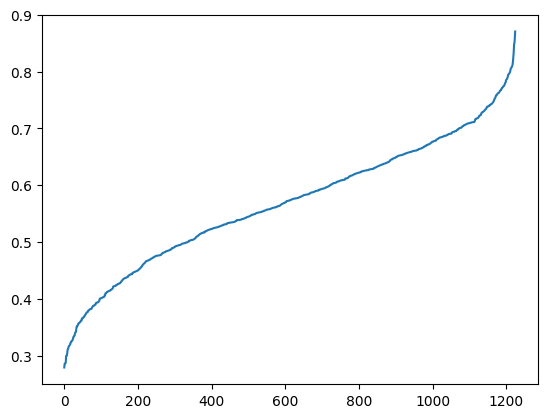

In [40]:
import matplotlib.pyplot as plt
plt.plot(np.sort(cosine_sim_arr(np.array(topics_vec))))

In [95]:
for i  in range(2000,2025):
    group_ids_t=patent_co[patent_co['申请年']<=i].groupby('Co')['序号'].apply(lambda x: x.to_list()).reset_index()
    co_ids_vec=model.group_vec(df_lda_w2v,group_ids_t)
    # co_ids_vec =group_ids_t['序号'].apply(lambda x: df_lda_w2v.loc[df_lda_w2v.index.isin(x)].mean(axis=0))
    # co_ids_vec.index = group_ids_t['Co']
    # co_ids_vec=co_ids_vec[co_ids_vec.sum(axis=1) != 0]  
    print(i,len(group_ids_t),len(co_ids_vec), cosine_sim_arr(co_ids_vec).mean())
    co_ids_vec.to_parquet(f'data\patent_co_vec_{model.suffix}_{i}.parquet')

co_ids_vec.shape

2000 17 17 0.8221987664100254
2001 30 30 0.8299951421442167
2002 42 42 0.834147388890356
2003 53 53 0.8398950392813077
2004 65 65 0.8435748945519989
2005 80 80 0.8405470114173441
2006 108 108 0.8235276540194817
2007 158 158 0.8259978964804031
2008 222 220 0.8290727397864613
2009 297 295 0.8344254771223177
2010 381 380 0.8369387656662225
2011 495 494 0.8355056767518776
2012 618 617 0.832059548623851
2013 775 774 0.8288785144426961
2014 953 952 0.8273081344221904
2015 1218 1218 0.8283968624652738
2016 1518 1518 0.8382623405763437
2017 1700 1700 0.8500114086347962
2018 1818 1818 0.8558593739115072
2019 1881 1881 0.8615641485504687
2020 1918 1918 0.8677199878658074
2021 2416 2416 0.8624084511638606
2022 2477 2477 0.865993639935187
2023 2496 2496 0.8679683805961972
2024 2497 2497 0.8679465512817406


(2497, 250)

In [96]:
co_ids_vec_1=pd.read_parquet(f'data\patent_co_vec_先进制造_{2024}.parquet')
co_ids_vec_1.shape

(7370, 250)

In [97]:
co_closeness=pd.DataFrame(cosine_similarity(co_ids_vec.values, co_ids_vec_1.values),index=co_ids_vec.index,columns=co_ids_vec_1.index)
co_closeness

Co,Dexta Robotics,TCL华星光电技术有限公司,TCL科技集团股份有限公司,一道新能源科技股份有限公司,七星电气股份有限公司,七腾机器人有限公司,万华新材料有限公司,万向一二三股份公司,万马科技股份有限公司,万鼎硅钢集团有限公司,...,黄山富田精工智造股份有限公司,黄山市光锐通信股份有限公司,黄石晨信光电股份有限公司,黑龙江哈工石墨科技有限公司,黑龙江林海华安新材料股份有限公司,黑龙江省发现者机器人股份有限公司,鼎桥通信技术有限公司,龙微科技无锡有限公司,龙腾半导体股份有限公司,龙芯中科技术股份有限公司
Co,,,,,,,,,,,,,,,,,,,,,
TCL科技集团股份有限公司,0.101352,0.183743,0.187115,0.167672,0.151452,0.165159,0.164751,0.166153,0.152028,0.149920,...,0.164265,0.136719,0.151843,0.168844,0.151709,0.156345,0.124436,0.169091,0.164474,0.152602
七星电气股份有限公司,0.145924,0.212115,0.213973,0.198027,0.188330,0.207529,0.196576,0.192629,0.196441,0.178987,...,0.200996,0.168868,0.185104,0.186246,0.193125,0.183461,0.157398,0.204100,0.205492,0.187596
万马科技股份有限公司,0.143666,0.215575,0.217199,0.202706,0.191830,0.208694,0.200936,0.195295,0.198532,0.182580,...,0.204083,0.173046,0.188724,0.191380,0.192145,0.190970,0.161512,0.209371,0.204664,0.186610
三友联众集团股份有限公司,0.158172,0.225281,0.229853,0.211153,0.198293,0.221263,0.205492,0.206018,0.205800,0.189298,...,0.211158,0.180658,0.195321,0.201679,0.202428,0.195550,0.170752,0.215308,0.218099,0.205700
三安光电股份有限公司,0.131685,0.176124,0.173664,0.147781,0.130663,0.161341,0.138768,0.147692,0.142322,0.124489,...,0.143585,0.119756,0.129168,0.153386,0.130319,0.138377,0.125539,0.151075,0.159444,0.177760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黄山市光锐通信股份有限公司,0.131295,0.203861,0.202314,0.186585,0.176234,0.193787,0.185304,0.182443,0.182900,0.169400,...,0.189122,0.158092,0.174916,0.174984,0.182894,0.171089,0.142495,0.191537,0.193313,0.172513
黄石晨信光电股份有限公司,0.131112,0.202577,0.205287,0.189444,0.180206,0.197143,0.186974,0.185011,0.185102,0.173617,...,0.191336,0.161352,0.178670,0.179173,0.181553,0.175540,0.149407,0.192850,0.195167,0.178200
黑龙江林海华安新材料股份有限公司,0.168808,0.222760,0.220509,0.207578,0.198249,0.217052,0.202030,0.195021,0.201842,0.185596,...,0.203617,0.187673,0.191261,0.191156,0.187155,0.199234,0.172813,0.214499,0.212054,0.207650


In [123]:
co_closeness.values.mean(),co_closeness.values.min(),co_closeness.values.max()

(0.18455702574218252, 0.02444332432288031, 0.30754764943618573)

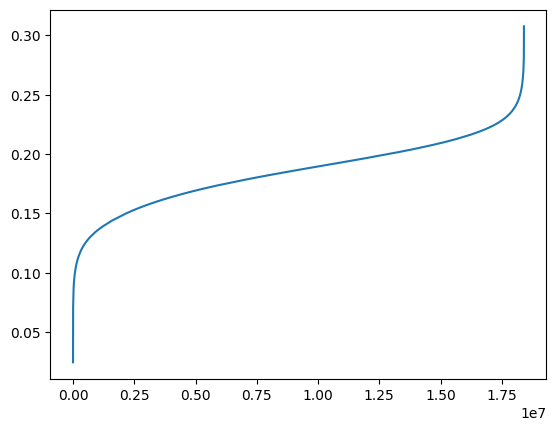

In [116]:
plt.plot(np.sort(co_closeness.values.reshape(-1)))

In [102]:
tmp=list(set(co_ids_vec.index)&set(co_ids_vec_1.index))
len(tmp)

2497

In [129]:
tmp[0],co_closeness.loc[tmp[0],tmp[0]]

('杭州指安科技股份有限公司', 0.2107123816664045)

In [130]:
tmp[10],co_closeness.loc[tmp[10],tmp[10]]

('南京北路智控科技股份有限公司', 0.18176352138060275)

In [121]:
co_multi=co_ids_vec.values @ co_ids_vec_1.values.T
co_multi

array([[0.44864363, 0.73196077, 0.73273069, ..., 0.64008304, 0.65937582,
        0.64821558],
       [0.59786466, 0.7820891 , 0.77553697, ..., 0.71510029, 0.76249921,
        0.73754983],
       [0.61107858, 0.82518448, 0.8172767 , ..., 0.76156889, 0.78841143,
        0.76167545],
       ...,
       [0.68304258, 0.81114855, 0.78931089, ..., 0.74221039, 0.77708526,
        0.80626545],
       [0.61781711, 0.82616777, 0.82815926, ..., 0.78647982, 0.81543869,
        0.7406053 ],
       [0.3375091 , 0.71042859, 0.71859018, ..., 0.64949768, 0.63020572,
        0.58999031]])

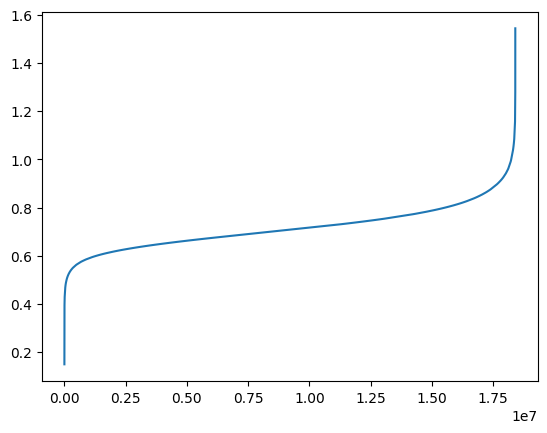

In [122]:
plt.plot(np.sort(co_multi.reshape(-1)))

In [157]:
tmp=list(set(co_ids_vec.index)|set(co_ids_vec_1.index))
len(tmp)

7370

In [159]:
import pickle
with open('data\先进制造企业名称.pkl', 'wb') as file:
    pickle.dump(tmp, file)

## 构造基于tech_net技术相似度加权的融资额度变量：
1、 对每个行业每一年计算tech_closenesss（我记得之前是不是只算了先进制造的，没有计算其他两个的？  ）
2、 基于每一年每个行业的tech_closeness矩阵，遍历该行业每家公司的每一个融资时间，针对该融资时间，计算与其技术相关的所有公司的tech_closeness加权平均VC_Amount（这个取在公司i融资时间前的那轮融资的vc_amount），得到tech_clos_amou   nt
下面是我之前写的代码，仅供参考，我感觉难点在2

In [ ]:
invest_data = pd.read_csv('/Users/wumian/Desktop/idea_tech_paper/data/patent_invest_2024_先进制造_医疗健康_发明授权_发明申请.csv')
all_round_1 = invest_data[invest_data['是否融资']==1]
invest_data_tech_closeness = all_round_1[all_round_1['行业']=='先进制造']
invest_data_tech_closeness = invest_data_tech_closeness.dropna(subset=['VC_Amount'])
invest_data_tech_closeness = invest_data_tech_closeness.sort_values(by=['融资时间'])
invest_data_tech_closeness = invest_data_tech_closeness[invest_data_tech_closeness['融资年份']>=2000]
tech_closeness = []

In [ ]:
final_invest_data_tech = pd.DataFrame()
for year  in range(2000,2018):
    print(year)
    cosine_sim = pd.read_excel(f'/Users/wumian/Desktop/idea_tech_paper/先进制造/patent_co_cosine_sim_先进制造_{year}.xlsx',sheet_name="Sheet1")#, index_col=0
    invest_data_tech_closeness_amount = invest_data_tech_closeness[(invest_data_tech_closeness['工商全称'].isin(cosine_sim.columns))&(invest_data_tech_closeness['融资年份']==year)]
    final_invest_data_tech = pd.concat([final_invest_data_tech,invest_data_tech_closeness_amount])
    for index, row in invest_data_tech_closeness_amount.iterrows():
        invest_date = row['融资时间']
        previous_invest_date =invest_data_tech_closeness_amount[invest_data_tech_closeness_amount['融资时间']<=invest_date].sort_values(by=['工商全称','融资时间'])
        recent_invest = previous_invest_date.drop_duplicates(subset=['工商全称'],keep='last')
        cosine_sim_recent_invest = cosine_sim[cosine_sim['Co'].isin(recent_invest['工商全称'])]
        cosine_sim_recent_invest_company = cosine_sim_recent_invest[list(recent_invest['工商全称'])]
        rows, cols = cosine_sim_recent_invest_company.shape

        for i in range(rows):
            for j in range(i + 1, cols):
                cosine_sim_recent_invest_company.iloc[i, j] = cosine_sim_recent_invest_company.iloc[j, i]
        closeness_invest = (np.dot(cosine_sim_recent_invest_company[row['工商全称']].fillna(0).values,recent_invest['VC_Amount'].values))/(cosine_sim_recent_invest_company[row['工商全称']].fillna(0).values.sum())
        tech_closeness.append(closeness_invest)

对于每一年每个行业的 tech_closeness 矩阵，针对该行业中每一家公司的每一次融资时间，计算一个加权平均的 VC_Amount，加权方式基于与这些公司技术相关性的 tech_closeness。  
对于某个公司 i 在特定融资时间 t，需要计算在 t 之前完成融资的所有公司与公司 i 的 tech_closeness，并用这些 tech_closeness 作为权重，计算这些公司最近一轮融资的 VC_Amount 的加权平均值

In [17]:
invest_data = pd.read_csv('data/patent_invest_2024_先进制造_医疗健康_发明授权_发明申请.csv',index_col=0)
all_round_1 = invest_data[invest_data['是否融资']==1]
invest_data_tech_closeness = all_round_1[all_round_1['行业']=='先进制造']
invest_data_tech_closeness = invest_data_tech_closeness.dropna(subset=['VC_Amount'])
invest_data_tech_closeness = invest_data_tech_closeness.sort_values(by=['融资时间'])
invest_data_tech_closeness = invest_data_tech_closeness[invest_data_tech_closeness['融资年份']>=2000]

In [18]:
invest_data_tech_closeness['融资时间']=pd.to_datetime(invest_data_tech_closeness['融资时间'])
invest_data_tech_closeness.shape

(20247, 60)

In [27]:
tech_closeness_results = []
final_invest_data_tech = pd.DataFrame()

for year in range(2000, 2025):
    # 获取该年或以前各公司的专利
    group_ids_t=patent_co_0[(patent_co_0['行业'] == '先进制造')&(patent_co_0['申请年']<=year)].groupby('Co')['序号'].apply(lambda x: x.to_list()).reset_index()
    co_ids_vec=model.group_vec(doc_lda_w2v,group_ids_t)#使用 lda_w2v 模型将公司的专利文档向量化后的表示
    cosine_sim=cosine_sim_df(co_ids_vec, triu=False)#表示公司之间的技术相似度
    
    invest_data_year = invest_data_tech_closeness[(invest_data_tech_closeness['融资年份'] == year) &(invest_data_tech_closeness['工商全称'].isin(cosine_sim.columns))]  # 当年融资数据
    print(year,len(group_ids_t),len(co_ids_vec), len(invest_data_year))#cosine_sim_arr(co_ids_vec).mean()
    
    final_invest_data_tech = pd.concat([final_invest_data_tech, invest_data_year])
    
    # 遍历该年份的每一笔融资
    for index, row in invest_data_year.iterrows():
        company_name = row['工商全称']
        invest_date = row['融资时间']
        
        # 筛选出在融资时间 `t` 之前的融资事件并取最近的一笔，保留自我相似度，考虑自己的融资数据？& (invest_data_year['工商全称'] != company_name)
        recent_invest = invest_data_year[(invest_data_year['融资时间'] < invest_date)].sort_values(by=['工商全称', '融资时间']).drop_duplicates(subset=['工商全称'], keep='last')
        
        if company_name in cosine_sim.index and not recent_invest.empty:
            tech_closeness_scores = cosine_sim.loc[company_name, recent_invest['工商全称']].fillna(0)  # 获取该公司与其他公司的技术相似度 
            # 计算加权平均VC_Amount，其他公司在最近一轮融资中的 VC 投资金额，得到目标公司与其技术相关公司之间的平均融资金额加权估计，权重为技术相似度，并对加权结果归一化处理
            weighted_vc_amount = np.dot(tech_closeness_scores.values, recent_invest['VC_Amount'].values) / tech_closeness_scores.sum()
            
            tech_closeness_results.append(weighted_vc_amount)
        else:
            tech_closeness_results.append(np.nan)

# 将计算结果添加到final_invest_data_tech
final_invest_data_tech['tech_closeness_weighted_vc_amount'] = tech_closeness_results

2000 12 12 2
2001 25 25 1
2002 37 37 4
2003 49 49 4
2004 65 65 1
2005 84 83 0
2006 131 130 8
2007 201 199 14
2008 302 298 25
2009 414 412 41
2010 575 574 96
2011 773 772 121
2012 982 980 109
2013 1286 1284 94
2014 1665 1664 348
2015 2273 2273 647
2016 3004 3004 925
2017 3648 3648 960
2018 4158 4158 799
2019 4573 4573 760
2020 4936 4936 872
2021 6450 6450 1643
2022 6878 6878 1749
2023 7187 7187 1618
2024 7195 7195 267


In [28]:
final_invest_data_tech.to_excel('data/patent_invest_202407_先进制造_未上市_发明授权_发明申请.xlsx')

In [29]:
%%time
invest_data_tech_closeness = all_round_1[all_round_1['行业']=='医疗健康']
invest_data_tech_closeness = invest_data_tech_closeness.dropna(subset=['VC_Amount'])
invest_data_tech_closeness['融资时间']=pd.to_datetime(invest_data_tech_closeness['融资时间'])
invest_data_tech_closeness = invest_data_tech_closeness.sort_values(by=['融资时间'])
invest_data_tech_closeness = invest_data_tech_closeness[invest_data_tech_closeness['融资年份']>=2000]

tech_closeness_results = []
final_invest_data_tech_1 = pd.DataFrame()

for year in range(2000, 2025):
    # 获取该年或以前各公司的专利
    group_ids_t=patent_co_0[(patent_co_0['行业'] == '医疗健康')&(patent_co_0['申请年'] <= year)].groupby('Co')['序号'].apply(lambda x: x.to_list()).reset_index()
    co_ids_vec=model.group_vec(doc_lda_w2v_1,group_ids_t)#使用 lda_w2v 模型将公司的专利文档向量化后的表示
    cosine_sim=cosine_sim_df(co_ids_vec, triu=False)#表示公司之间的技术相似度
    
    invest_data_year = invest_data_tech_closeness[(invest_data_tech_closeness['融资年份'] == year) &(invest_data_tech_closeness['工商全称'].isin(cosine_sim.columns))]  # 当年融资数据
    print(year,len(group_ids_t),len(co_ids_vec), len(invest_data_year))#cosine_sim_arr(co_ids_vec).mean()
    
    final_invest_data_tech_1 = pd.concat([final_invest_data_tech_1, invest_data_year])
    
    # 遍历该年份的每一笔融资
    for index, row in invest_data_year.iterrows():
        company_name = row['工商全称']
        invest_date = row['融资时间']
        
        # 筛选出在融资时间 `t` 之前的融资事件并取最近的一笔，保留自我相似度，考虑自己的融资数据？& (invest_data_year['工商全称'] != company_name)
        recent_invest = invest_data_year[(invest_data_year['融资时间'] < invest_date)].sort_values(by=['工商全称', '融资时间']).drop_duplicates(subset=['工商全称'], keep='last')
        
        if company_name in cosine_sim.index and not recent_invest.empty:
            tech_closeness_scores = cosine_sim.loc[company_name, recent_invest['工商全称']].fillna(0)  # 获取该公司与其他公司的技术相似度 
            # 计算加权平均VC_Amount，其他公司在最近一轮融资中的 VC 投资金额，得到目标公司与其技术相关公司之间的平均融资金额加权估计，权重为技术相似度，并对加权结果归一化处理
            weighted_vc_amount = np.dot(tech_closeness_scores.values, recent_invest['VC_Amount'].values) / tech_closeness_scores.sum()
            
            tech_closeness_results.append(weighted_vc_amount)
        else:
            tech_closeness_results.append(np.nan)

# 将计算结果添加到final_invest_data_tech
final_invest_data_tech_1['tech_closeness_weighted_vc_amount'] = tech_closeness_results
final_invest_data_tech_1.to_excel('data/patent_invest_202407_医疗健康_未上市_发明授权_发明申请.xlsx')

2000 16 16 1
2001 21 21 2
2002 39 36 3
2003 59 55 2
2004 74 68 7
2005 100 94 3
2006 130 127 5
2007 174 170 5
2008 204 200 8
2009 255 251 12
2010 318 316 50
2011 424 422 49
2012 530 528 56
2013 687 685 64
2014 909 907 174
2015 1231 1229 378
2016 1594 1592 560
2017 1948 1946 529
2018 2233 2231 544
2019 2482 2478 483
2020 2691 2689 589
2021 3188 3186 1023
2022 3393 3391 759
2023 3531 3529 622
2024 3534 3532 88
CPU times: total: 6min 23s
Wall time: 6min 22s


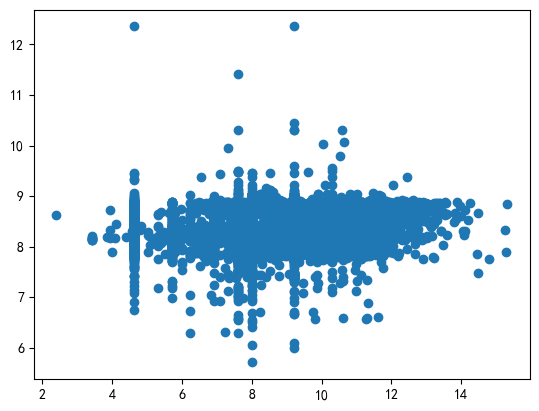

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.scatter(final_invest_data_tech['VC_Amount'],final_invest_data_tech['tech_closeness_weighted_vc_amount'])

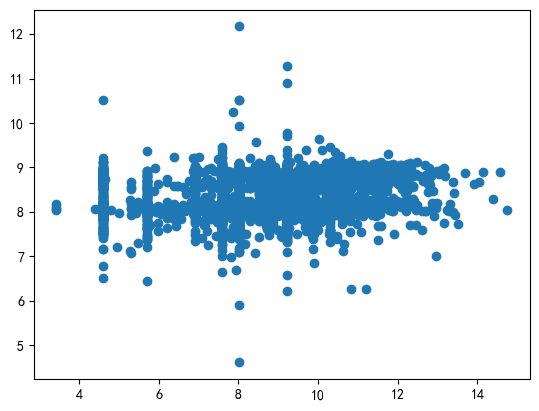

In [33]:
plt.scatter(final_invest_data_tech_1['VC_Amount'],final_invest_data_tech_1['tech_closeness_weighted_vc_amount'])

In [35]:
final_invest_data_tech=pd.concat([final_invest_data_tech,final_invest_data_tech_1])
final_invest_data_tech.shape

(17124, 61)

In [5]:
final_invest_data_tech.to_excel('data/patent_invest_202407_未上市_发明授权_发明申请.xlsx')

In [2]:
import pandas as pd
final_invest_data_tech=pd.read_excel('data/patent_invest_202407_未上市_发明授权_发明申请.xlsx',index_col=0)

In [3]:
final_invest_data_tech.columns

Index(['公司序号', '公司简称', '工商全称', '成立时间', '公司简介', '省', '市', '行业', '子行业', '估算估值',
       '北上广深', '首次上市日期', '目前已上市', '成立年份', '融资年份', '融资时间', '轮次', '金额', '币种',
       '等值人民币（万）', '投资机构', 'VC_Amount', 'Cum_invset', 'Age', 'VC-num', '有披露',
       '上市Days', '观察年', '是否融资', '投资时间_Shift', 'Application_num', 'IPC主分类_去重',
       'IPC主分类_平均', 'IPC_个数_去重', 'IPC_个数_平均', '知识宽度', '被引证次数', '引证数量',
       '引证数量_去重', '引证数量_平均', '简单同族个数', '简单同族_去重', '简单同族美日欧_比例', '发明人数量',
       '发明人数量_去重', '发明人数量_平均', '权利要求数量', '引证科技文献数量', '有效数量', '有效_比例', '发明授权',
       '发明申请', '高科技企业', '经度', '纬度', 'vc_first', 'vc_distance', 'VC行业经验',
       'vc_mktexp', 'vc_rep', 'tech_closeness_weighted_vc_amount'],
      dtype='object')

In [4]:
final_invest_data_tech['融资阶段_初创/商业化'] = final_invest_data_tech['轮次'].apply(lambda x: '初创融资阶段' if any(tag in x for tag in ['种子轮','天使轮','Pre-A','A轮','A+轮','Pre-B轮','B轮','B+轮'])
else '商业化融资阶段' )

In [7]:
final_invest_data_tech.行业.unique()

array(['先进制造', '医疗健康'], dtype=object)